# Class 06: Graphing in Python 2 part 1

Matplotlib - density plots & 2D graphics 

- Complete the activities as instructed by the professor

#### Import any packages we need below (update as we go):

In [1]:
import matplotlib.pyplot as plt
import numpy as np


## Density Plots 


####  Creating a density plot

- Read in the 'circular.txt' data
- create a density plot
- switch the origin to the lower left


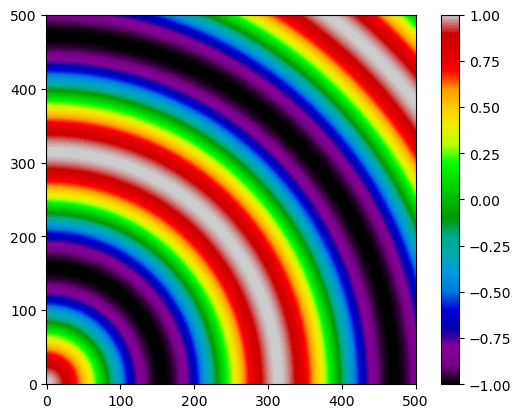

2


In [18]:
data = np.loadtxt("//wsl.localhost/Ubuntu/home/benma/Phys230/CompPhys26/ClassNotebooks/circular.txt")
plt.imshow(data, origin="lower")
plt.nipy_spectral()
plt.colorbar()
plt.show()

print(np.ndim(data))

#### Color-scales and colorbars
-  For the plot above: 
    - change the color-scale 
    - add a colorbar

#### Additional Density Plot Customizations 
- Play around with `extent` to see how it impacts the density plot 
- change the axis ratio using `aspect`

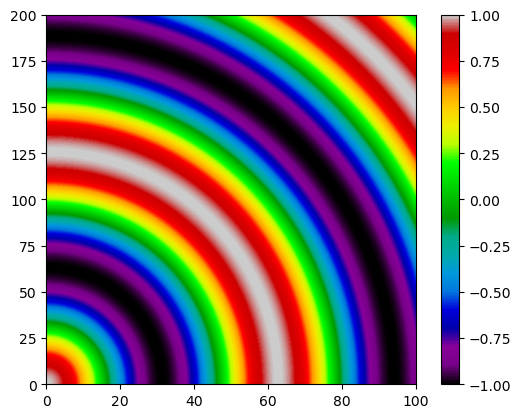

In [23]:
plt.imshow(data, origin="lower", extent=[0,100,0,200], aspect=0.5)
plt.colorbar()
plt.show()

#### Book Example: Wave interference (page 108)

Suppose we drop a pebble in a pond and waves radiate out from the spot where it fell. We could create a simple representation of the physics with a sine wave, spreading out in a uniform circle, to represent the height of the waves at some later time. If the center of the circle is at $x_1$, $y_1$ then the distance $r_1$ to the center from a point $x, y$ is

For the distance from the center of a circlular wave:

$$ r_1 = \sqrt{(x-x_1)^2+(y-y_1)^2} $$
and the height of the wave on a surface would be sinusoidal:

$$ h_1(x,y) = h_0\sin{kr_1} $$
where $k = 2\pi/\lambda$ is the wave vector. 

To superimpose two waves, we need a second set of distances and heights: 

$$ r_2 = \sqrt{(x-x_2)^2+(y-y_2)^2} $$

$$ h_2(x,y) = h_0\sin{kr_2} $$


The superposition is of the heights at any location: 

$$ h(x,y) = h_0\sin{kr_1} + h_0\sin{kr_2}$$

Suppose the wavelength of the waves is $\lambda$ = 5 cm, the amplitude is 1 cm, and the centers of the circles are 20 cm apart. Here is a program to make an image of the height over a 1 m square region of the pond. To make the image we create an array of values representing the height $h$ at a grid of points and then use that array to make a density plot. In this example we use a grid of 500 × 500 points to cover the 1 m square, which means the grid points have a separation of 100/500 = 0.2 cm.

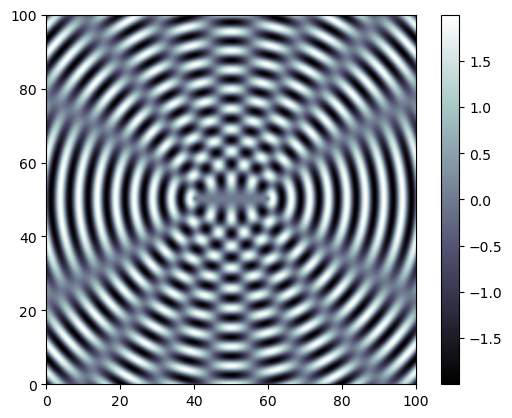

In [31]:
# constants
wavelength = 5. #in cm
k = 2*np.pi/wavelength #Wave vector
h0 = 1. #amplitude in cm
seperation = 20. #cm seperation of circles

#Set up grid information
side = 100 #Side of pond in cn
points = 500 #Number of elements per side of the array
spacing = side/points # spacing of points in grid in physical units

#Calculate the positions of the centers of each circle
x1 = (side/2)-(seperation/2)
y1 = side/2
x2 = (side/2)+(seperation/2)
y2 = side/2

# create array to store the heights of the superpositioned waves
h = np.zeros([points,points],float)

# calculate the heights
for i in range(points): # y values
    y = i*spacing
    for j in range(points): #x values
        x = j*spacing
        r1 = np.sqrt((x-x1)**2+(y-y1)**2)
        r2 = np.sqrt((x-x2)**2+(y-y2)**2)
        h1 = h0*np.sin(k*r1)
        h2 = h0*np.sin(k*r2)
        h[i,j] = h1 + h2

#make the density plot 
plt.imshow(h, origin="lower", extent=[0,side,0,side])
plt.colorbar()
plt.bone()
plt.show()




#### Create an array to make a density plot

Create an array that is 50x50 for a density plot. To do so: 
- create a 1D array `theta` that is 50 values equally spaced between 0 and 3$\pi$ 
- create an 2 arrays: each should be a 1D array that is $5\sin$(`theta`)
- Now, in a 2D array that is 50x50, loop through the add the two arrays together 

## Drawings in Python

In [1]:
from qdraw import window, circle, square, show, draw
import numpy as np
import matplotlib.pyplot as plt
import math

ModuleNotFoundError: No module named 'qdraw'

#### Let's create a window that has a circle

- Note, you must use `draw()` for the separate window to pop up. It will remain open and continue to update each time you call `draw()` again 
    - you will have to restart the kernel when it is closed though! 
- You can alternatively use `show()` but if you then close the window, which you will have to, you will need to restart the kernel to do anything else. 

In [ ]:
window(xlim=[-1,1], ylim=[-1,1])
circle(pos=[0,0],size=1,color="blue")
draw()

#### We can add a second circle that is green!

In [ ]:
circle2=circle(pos=[0.5,0.5]size=0.5,color="green")
draw()

#### And we can put a lattice of squares on top of that. 

In [ ]:
L = 1
s = 0.3
for i in range(-L,L+1):
    for j in range(-L,L+1):
        square(pos=[i,j], size=s)
        draw(0.5)

RuntimeError: No graphics window

#### Atomic Lattice Example

#### Let's make a circle move! 

In [ ]:
window(xlim=[-1.1,1.1],ylim=[-1.1,1.1])
c = circle(size=0.2, pos=[1,0])
for theta in np.arange(0,10*np.pi,0.02):
    x=np.cos(theta)
    y=np.sin(theta)
    c.setpos(x,y)
    draw(0.01)

: 